In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import seaborn as sns; sns.set()
from shapely.geometry import Point
import geopandas as gpd
import folium
states_base = gpd.read_file("../data/maps/ne_50m_admin_1_states_provinces_lakes/ne_50m_admin_1_states_provinces_lakes.shp")
plt.figure()
%matplotlib inline
plt.rc('figure', figsize=(20.0, 10.0))


### Import GBIF Data

In [6]:
all_occs = pd.read_csv('../data/occs/sceloporus_occidentalis_westus.csv', sep='\t')
print("%d records loaded from GBIF file."%len(all_occs))

28110 records loaded from GBIF file.


/Users/tony/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


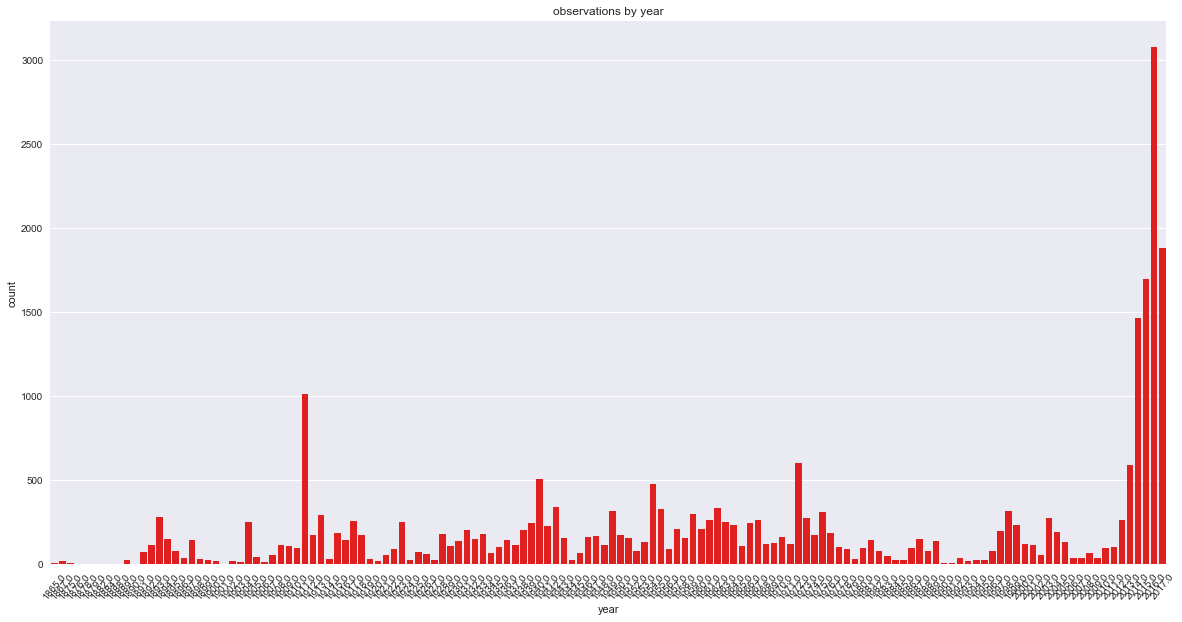

In [7]:
yeardist = sns.countplot(x='year', data=all_occs, color='r')
plt.setp(yeardist.get_xticklabels(), rotation=50)
plt.title("observations by year")

yeardist

In [8]:
too_uncertain = all_occs[(all_occs.coordinateuncertaintyinmeters > 5000) |
                         ((all_occs.year < 2000) & (all_occs.coordinateuncertaintyinmeters < 3)) |
                         ((all_occs.year >= 2000) & (all_occs.coordinateuncertaintyinmeters < 200))]
print(str(len(too_uncertain)) + " records to remove for uncertainty.")

7619 records to remove for uncertainty.


In [9]:
precise_occs = all_occs.drop(too_uncertain.index, axis = 0)
print(str(len(precise_occs)) + " records remain after removal.")

20491 records remain after removal.


In [10]:
historicMin, historicMax = 1900, 1939
currentMin, currentMax = 1970, 2009

In [11]:
historic = precise_occs[(precise_occs.year >= historicMin) & (precise_occs.year <= historicMax)]
current  = precise_occs[(precise_occs.year >= currentMin) & (precise_occs.year <= currentMax)]

In [12]:
print("%d historic observations"%len(historic))
print("%d current observations"%len(current))

4786 historic observations
4344 current observations


In [20]:
historic_locs = [Point(xy) for xy in zip(historic.decimallongitude, historic.decimallatitude)]
historic_geo = gpd.GeoDataFrame(data=historic, geometry=historic_locs)
current_locs  = [Point(xy) for xy in zip(current.decimallongitude, current.decimallatitude)]
current_geo = gpd.GeoDataFrame(data=current, geometry=current_locs)

historic_bbox = historic_geo.total_bounds
current_bbox = current_geo.total_bounds

print(historic_bbox)
print(current_bbox)


(-124.497327, 31.016666999999998, -105.00700000000001, 48.335399999063327)
(-124.425663, 30.98340977670043, -114.13846699999999, 47.561315999060682)


### Some Plots

/Users/tony/miniconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1434: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


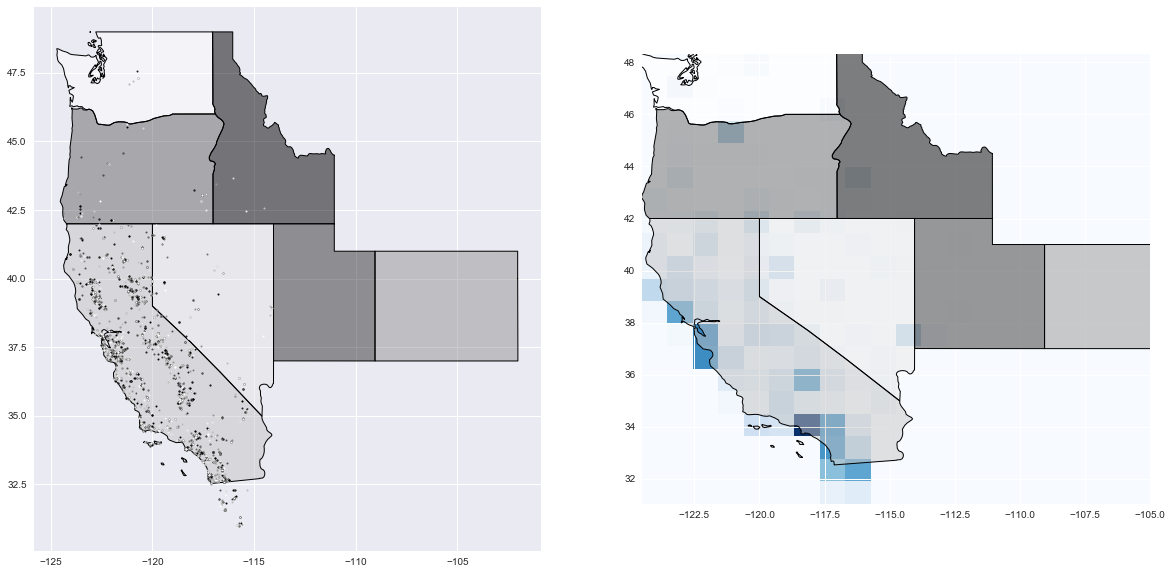

In [131]:
fig, ax = plt.subplots(1,2)

pointInPolys = gpd.sjoin(historic_geo, states_base, how='left')
statepolys = states_base.iloc[list(pointInPolys.groupby('index_right').groups.keys())]
current_geo.plot(ax=statepolys.plot(ax=ax[0]))

heatmap, xedges, yedges = np.histogram2d(historic.decimallongitude, historic.decimallatitude, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
statepolys.plot(ax=ax[1]).imshow(heatmap.T, cmap='Blues', extent=extent, origin='lower')


/Users/tony/miniconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1434: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


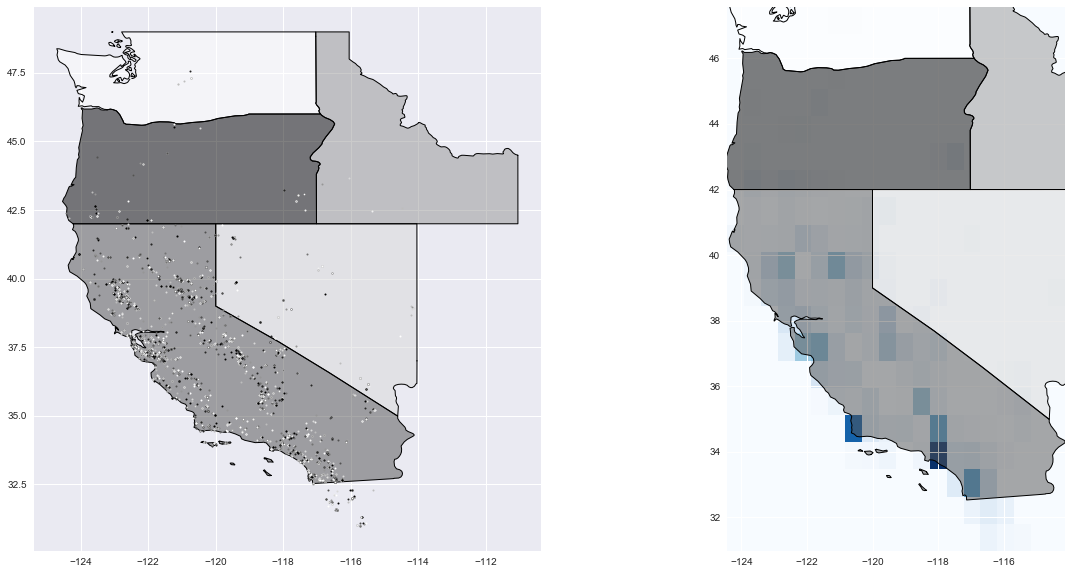

In [130]:
fig, ax = plt.subplots(1,2)

pointInPolys = gpd.sjoin(current_geo, states_base, how='left')
statepolys = states_base.iloc[list(pointInPolys.groupby('index_right').groups.keys())]
current_geo.plot(ax=statepolys.plot(ax=ax[0]))

heatmap, xedges, yedges = np.histogram2d(current.decimallongitude, current.decimallatitude, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
statepolys.plot(ax=ax[1]).imshow(heatmap.T, cmap='Blues', extent=extent, origin='lower')

